In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D

### Modelo de Regressão Linear Simples

O modelo de regressão linear simples é dado por:

$$
\hat{y}^{(i)} = h_\theta(x^{(i)}) = \theta_0 + \theta_1 x^{(i)}
$$

Sendo $x^{(i)}$ o valor da característica do exemplo \( i \).

---

### Função de Custo

A função de custo utilizada é:

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)^2
$$

Essa função é o **Erro Quadrático Médio (MSE)**. Ela serve para monitorar o erro da predição em relação aos valores reais das amostras, à medida que os parâmetros $\theta_0$ e $\theta_1$ são ajustados.

Sua implementação, está descrita abaixo:

In [2]:
##Função de custo
def calcular_custo(theta_values, features, targets, samples):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma = 0
    
    for i in range(samples):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        sigma += erro**2

    return (1/(2*samples)) * sigma

###  Cálculo do Gradiente

O cálculo do gradiente se dá por meio da derivada parcial da função de custo.  
Na implementação **batch**, todos os dados disponíveis são utilizados para calcular o gradiente, por meio da fórmula do somatório descrita abaixo:

$$
\frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right)
$$

$$
\frac{\partial J(\theta)}{\partial \theta_1} = \frac{1}{m} \sum_{i=1}^{m} \left( \hat{y}^{(i)} - y^{(i)} \right) x_j^{(i)}
$$

A sua implementação, é dada pela função abaixo:

In [3]:
##Calcular o gradiente
def calcular_gradiente(theta_values, features, targets, samples):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma_0 = 0
    sigma_1 = 0

    for i in range(samples):
        pred = theta_0 + theta_1 * features[i]
        erro = pred - targets[i]
        sigma_0 += erro
        sigma_1 += erro * features[i]
        
    grad_theta_0 = (1/samples) * sigma_0
    grad_theta_1 = (1/samples) * sigma_1

    return [grad_theta_0, grad_theta_1]

### Atualização dos Parâmetros $\theta$

Para atualizar os parâmetros $\theta$, é necessário subtrair o valor atual pelo gradiente multiplicado pela taxa de aprendizado $\alpha$.  

Essa fórmula é utilizada porque o gradiente aponta na direção de **maior aumento** da função de custo. Logo, para minimizar essa função, devemos nos mover na **direção oposta ao gradiente** — por isso o sinal negativo.

O valor de $\alpha$ determina o tamanho dos “passos” dados em direção ao mínimo da função de custo. Quando $\alpha$ é muito grande, os passos podem ser largos demais e **ultrapassar o mínimo**, dificultando a convergência. Quando $\alpha$ é muito pequeno, os passos são lentos e o treinamento pode demorar a convergir.

A fórmula de atualização dos parâmetros é:

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}
$$

Sua implementação é mostrada abaixo:

In [4]:
##Atualização do theta
def atualizar_theta(theta_values, features, targets, samples, learning_rate, num_iters):
    theta_0 = theta_values[0]
    theta_1 = theta_values[1]
    sigma_0 = 0
    sigma_1 = 0
    armazenar_custo = []
    armazenar_theta_0 = []
    armazenar_theta_1 = []

    for i in range(num_iters):
        armazenar_custo.append(calcular_custo([theta_0, theta_1], features, targets, samples))
        armazenar_theta_0.append(theta_0)
        armazenar_theta_1.append(theta_1)
        grad = calcular_gradiente([theta_0, theta_1], features, targets, samples)
        theta_0 = theta_0 - learning_rate * grad[0]
        theta_1 = theta_1 - learning_rate * grad[1]
        

    return [theta_0, theta_1], armazenar_custo, [armazenar_theta_0, armazenar_theta_1]

---
## Aplicação do gradiente batch

No exemplo abaixo, é utilizado um conjunto de dados fictício, onde a primeira coluna descreve o tamanho das casas e a segunda, o valor delas.

In [5]:
##Carregar e formatar dados
data = np.loadtxt("./Data/data1.txt", delimiter = ",")
x = data[:, 0]
y = data[:, 1]

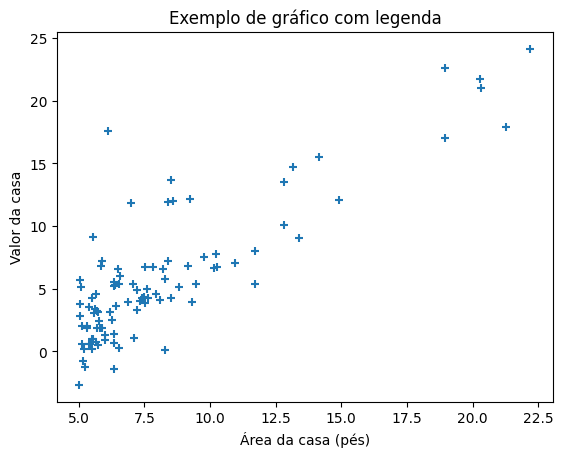

In [6]:
##Disposição dos dados no plano
plt.scatter(x, y, marker = "+")
plt.title('Exemplo de gráfico com legenda')
plt.xlabel('Área da casa (pés)')
plt.ylabel('Valor da casa')
plt.show()

Aqui é realizada a inicialização dos parâmetros. Note que o vetor $\theta$ é iniciado com $\theta_0 = 0$ e $\theta_1 = 0$,  pois ainda não conhecemos seus valores ideais. Por padrão, ambos começam com esse valor.

In [7]:
##Inicialização dos parâmetros
theta = [0, 0]
m = len(x)
alpha = 0.01
iteracoes = 1500

Com a aplicação na função de atualização de theta implementada acima:

In [8]:
theta_atualizado, custo_atualizado, hist_theta = atualizar_theta(theta, x, y, m, alpha, iteracoes)

In [9]:
##O valor atualizado de theta:
theta_atualizado

[-3.63029143940436, 1.166362350335582]

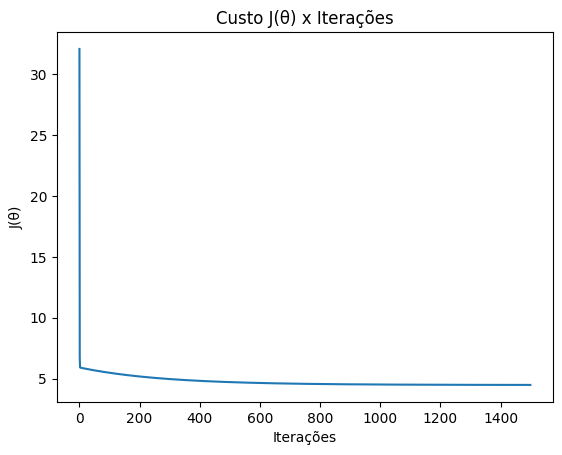

In [10]:
##Visualição do custo
plt.plot(custo_atualizado)
plt.title('Custo J(θ) x Iterações')
plt.xlabel('Iterações')
plt.ylabel('J(θ)')
plt.show()

Para validar o modelo, o código abaixo gera os valores de $\theta$ com uma função já implementada pelo Scikit-learn.

In [11]:
##Comparando com os parâmetros de theta do scikit-Learn
modelo = LinearRegression()
modelo.fit(x.reshape(-1, 1), y)

theta_scikit = [modelo.intercept_, modelo.coef_[0]]
theta_scikit

[-3.895780878311852, 1.1930336441895937]

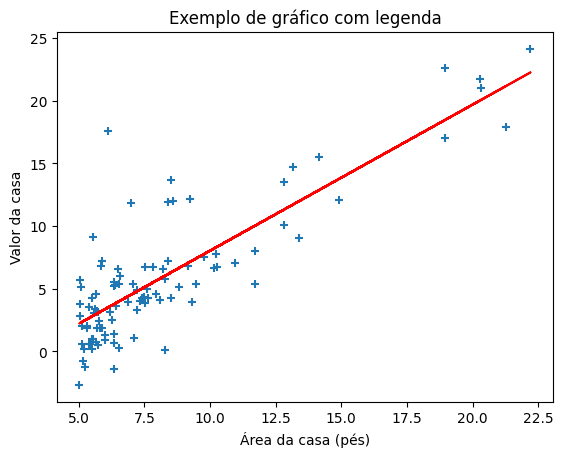

In [12]:
##Visualização da reta, com base nos valores de theta gerados
y_previstos = theta_atualizado[0] + theta_atualizado[1] * x

plt.scatter(x, y, marker = "+")
plt.plot(x, y_previstos, color = "red")
plt.title('Exemplo de gráfico com legenda')
plt.xlabel('Área da casa (pés)')
plt.ylabel('Valor da casa')
plt.show()

### Análise do Custo em Relação aos Parâmetros

Nesta etapa, analisamos como os valores de $\theta$ evoluem ao longo das iterações, observando o comportamento do gradiente e sua trajetória até a convergência.

Inicialmente, calcula-se o custo para cada combinação de $\theta_0$ e $\theta_1$, a fim de observar a forma da superfície da função de custo.

In [13]:
##Cálculo e formatação das variáveis para plot da superfície
theta_0_values = np.linspace(-10, 10, 100)
theta_1_values =  np.linspace(-10, 10, 100)
T0, T1 = np.meshgrid(theta_0_values, theta_1_values)
all_custo = []

for i in range(100):
    for j in range(100):
        all_custo.append(calcular_custo([theta_0_values[i], theta_1_values[j]], x, y, int(len(x))))

J_vals = np.array(all_custo).reshape(100, 100)

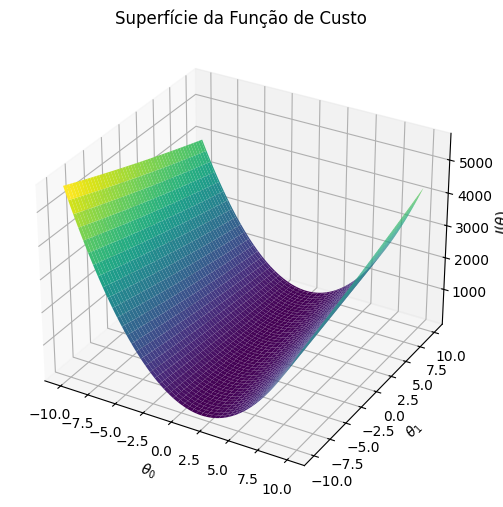

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

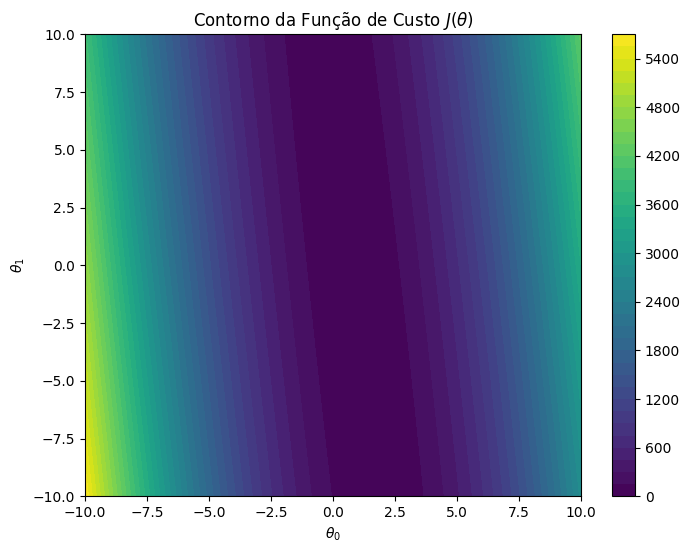

In [15]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

Agora analisando a trajetória do gradiente em cima da superfície do custo:

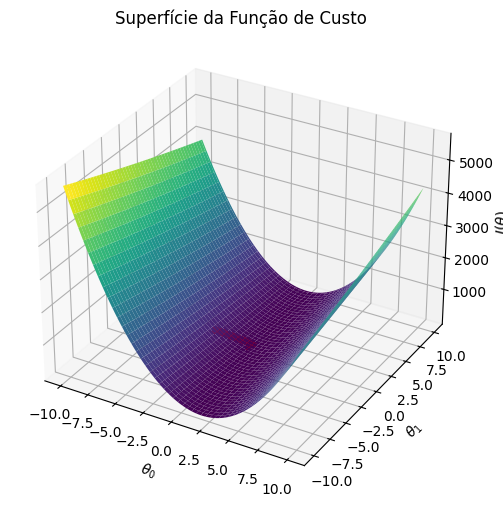

In [16]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(hist_theta[0], hist_theta[1], custo_atualizado, color='red', marker='o', markersize=3, linewidth=2, label='Trajetória')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

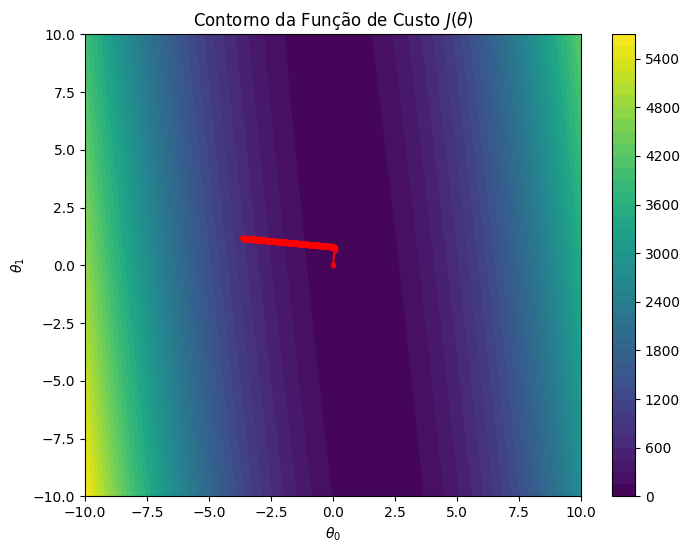

In [17]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(hist_theta[0], hist_theta[1], color='red', marker='o', markersize=3, linewidth=1.5, label='Trajetória do Gradiente')
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

---
### Teste de Inicialização de Parâmetros

Quando se utiliza o gradiente descendente, existe o risco de o algoritmo convergir para **mínimos locais** em vez do **mínimo global**. Uma estratégia para mitigar esse problema é **inicializar os parâmetros $\theta$ em diferentes posições**, forçando o gradiente a explorar melhor o espaço de busca.

Desta vez, realizaremos o mesmo procedimento, mas com $\theta_0$ iniciado em **-10** e $\theta_1$ em **10**.


In [18]:
##Cálculo de novo gradiente com valores de theta atualizados.
iteracoes = 3500
theta_atualizado, custo_atualizado, hist_theta = atualizar_theta([-10, 10], x, y, m, alpha, iteracoes)

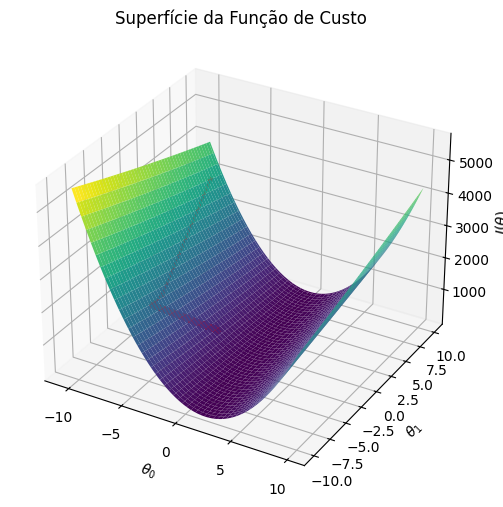

In [19]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot(hist_theta[0], hist_theta[1], custo_atualizado, color='red', marker='o', markersize=3, linewidth=2, label='Trajetória')
ax.plot_surface(T0, T1, J_vals, cmap='viridis', edgecolor='none')
ax.set_title('Superfície da Função de Custo')
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'$J(\theta)$')
plt.show()

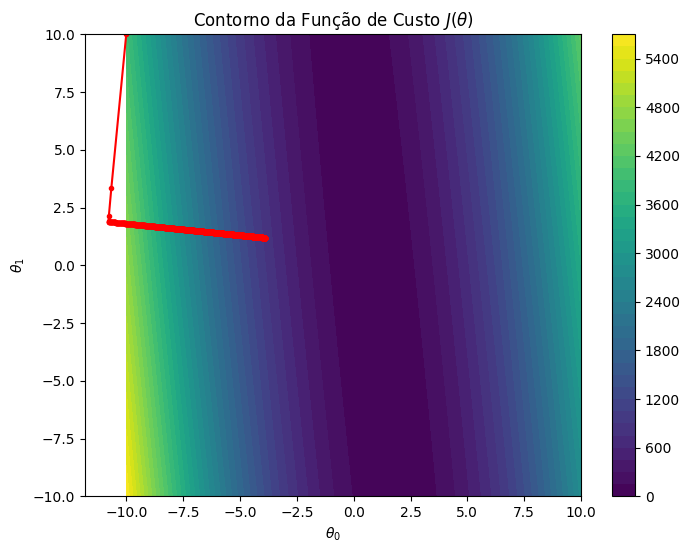

In [20]:
plt.figure(figsize=(8, 6))
cp = plt.contourf(T0, T1, J_vals, levels=50, cmap='viridis')
plt.colorbar(cp)
plt.plot(hist_theta[0], hist_theta[1], color='red', marker='o', markersize=3, linewidth=1.5, label='Trajetória do Gradiente')
plt.title('Contorno da Função de Custo $J(\\theta)$')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.show()

Observa-se que os valores iniciais de $\theta$ influenciaram diretamente a trajetória de otimização. Apesar do aumento no número de iterações, o gradiente produziu um novo conjunto de parâmetros $\theta$, com uma trajetória mais longa — o que era esperado, dado que os valores iniciais estavam mais distantes do mínimo.

Esse experimento reforça a importância da escolha da **inicialização dos parâmetros**, que pode impactar tanto a velocidade de convergência quanto a qualidade da solução encontrada.
